In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

СТРОИМ Z - распределение

In [55]:
population = np.random.normal(mu, sigma, 1000).round(2)

In [56]:
mu = population.mean()
sigma = population.std()

In [57]:
sample = np.random.choice(population, sample_size, False)

In [65]:
sample_size = 15

In [59]:
se = sigma / sample_size ** 0.5

In [60]:
z_scores = []

In [61]:
#создали выборку из ГС. Взяли 1000 выборок
n = 10000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    
    z_score = (sample_mean - mu) / se
    z_scores.append(z_score)

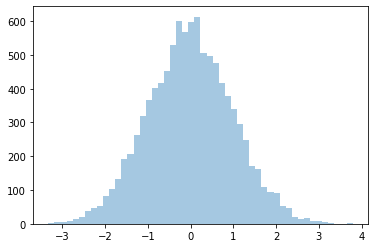

In [66]:
sns.distplot(z_scores, kde=False)

СТРОИМ T - распределение

In [62]:
t_scores = []


In [63]:
#t score считаем
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    se_ = sample_std / sample_size ** 0.5
    
    t_score = (sample_mean - mu) / se_
    t_scores.append(t_score)

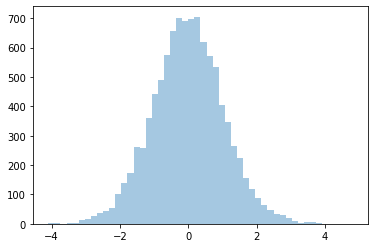

In [67]:
sns.distplot(t_scores, kde=False)

# ЛЕКЦИЯ. РЕШЕНИЕ ПРАКТИЧЕСКИХ ЗАДАЧ

In [111]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import numpy as np
%matplotlib inline

In [112]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/shared/ads_data.csv.zip')

In [113]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [114]:
df = ads_data.groupby(['ad_id', 'ad_cost_type', 'platform', 'event'], as_index = False) \
    .agg({'user_id':'count'})


In [115]:
df.head()

,ad_id,ad_cost_type,platform,event,user_id
0,3,CPC,android,click,5
1,3,CPC,android,view,244
2,3,CPC,ios,click,3
3,3,CPC,ios,view,147
4,3,CPC,web,click,1


In [21]:
#разделили click и view в events
df = df.pivot(index=['ad_id', 'ad_cost_type', 'platform'], columns = 'event', values = 'user_id')


In [23]:
df = df.reset_index()

In [24]:
df.head()

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0
3,2132,CPC,android,1.0,55.0
4,2132,CPC,ios,NaN,26.0


In [25]:
cost_type_df = df.groupby(['ad_id', 'ad_cost_type'], as_index=False) \
    .agg({'click':'sum', 'view':'sum'})

In [26]:
cost_type_df = cost_type_df.query('view > 100 & click > 0')

In [27]:
cost_type_df = cost_type_df.assign(ctr = cost_type_df.click / cost_type_df.view )

In [28]:
cost_type_df


,ad_id,ad_cost_type,click,view,ctr
0,3,CPC,9.0,490.0,0.018367
2,2276,CPC,2.0,1454.0,0.001376
4,2643,CPM,3.0,286.0,0.010490
5,4585,CPC,53.0,476.0,0.111345
6,4877,CPC,5.0,2160.0,0.002315
...,...,...,...,...,...
350,121941,CPM,1.0,640.0,0.001563
351,121943,CPC,15.0,1722.0,0.008711
352,122042,CPM,1.0,155.0,0.006452
353,122063,CPM,1.0,260.0,0.003846


In [29]:
cost_type_df['ctr_log'] = np.log( cost_type_df.ctr)

In [165]:
cost_type_df

,ad_id,ad_cost_type,click,view,ctr,ctr_log
0,3,CPC,9.0,490.0,0.018367,-3.997181
2,2276,CPC,2.0,1454.0,0.001376,-6.588926
4,2643,CPM,3.0,286.0,0.010490,-4.557380
5,4585,CPC,53.0,476.0,0.111345,-2.195126
6,4877,CPC,5.0,2160.0,0.002315,-6.068426
...,...,...,...,...,...,...
350,121941,CPM,1.0,640.0,0.001563,-6.461468
351,121943,CPC,15.0,1722.0,0.008711,-4.743191
352,122042,CPM,1.0,155.0,0.006452,-5.043425
353,122063,CPM,1.0,260.0,0.003846,-5.560682


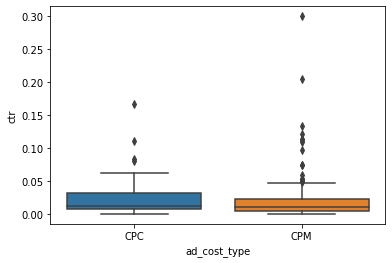

In [164]:
sns.boxplot(x='ad_cost_type' , y='ctr', data=cost_type_df)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


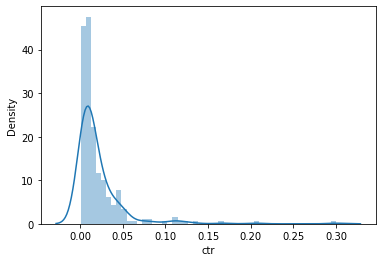

In [31]:
#распределение ctr, видим что он распределен не нормально
sns.distplot(cost_type_df.ctr)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


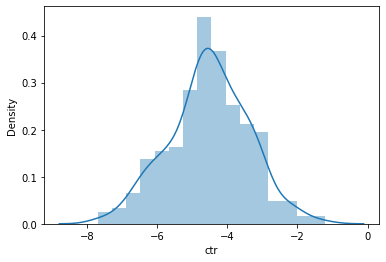

In [32]:
#поэтому берем и логарифмируем
sns.distplot(np.log(cost_type_df.ctr))

In [34]:
cost_type_df.groupby('ad_cost_type', as_index=False) \
    .agg({'ctr': 'mean'})

,ad_cost_type,ctr
0,CPC,0.024107
1,CPM,0.019467


In [36]:
a = cost_type_df[cost_type_df.ad_cost_type == "CPM"].ctr_log
b = cost_type_df[cost_type_df.ad_cost_type == "CPC"].ctr_log


In [37]:
ttest_ind(a,b)

Ttest_indResult(statistic=-1.1407296867039143, pvalue=0.25489224816951805)

<h2> Проверим ctr по Platform

In [117]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [120]:
df_2 = ads_data.groupby(['ad_id', 'platform', 'event'],as_index = False) \
    .agg({'user_id':'count'})

In [121]:
df_2.head()

,ad_id,platform,event,user_id
0,3,android,click,5
1,3,android,view,244
2,3,ios,click,3
3,3,ios,view,147
4,3,web,click,1


In [139]:
df_plt = df_2.pivot(index=['ad_id', 'platform'], columns='event', values='user_id').reset_index().dropna()

In [136]:
df_plt.head()

event,ad_id,platform,click,view
0,3,android,5.0,244.0
1,3,ios,3.0,147.0
2,3,web,1.0,99.0
3,2132,android,1.0,55.0
6,2276,android,2.0,703.0


In [141]:
#смотрим характеристики дф. Видим что 50 персентиль 247, можем убрать просмотры, которые меньше 50
df_plt.describe()

event,ad_id,click,view
count,739.000000,739.000000,739.000000
mean,58087.357240,794.556157,3451.633288
std,37439.250967,13138.536181,43877.317194
min,3.000000,1.000000,15.000000
25%,34291.000000,1.000000,99.000000
50%,43950.000000,3.000000,247.000000
75%,105142.000000,8.000000,661.500000
max,122086.000000,289516.000000,968129.000000


In [142]:
df_plt = df_plt.query('click > 0 & view > 50 ')

In [143]:
df_plt = df_plt.assign(ctr = df_plt.click / df_plt.view)

In [154]:
df_plt.head()

event,ad_id,platform,click,view,ctr
0,3,android,5.0,244.0,0.020492
1,3,ios,3.0,147.0,0.020408
2,3,web,1.0,99.0,0.010101
3,2132,android,1.0,55.0,0.018182
6,2276,android,2.0,703.0,0.002845


In [171]:
df_plt['ctr_log'] = np.log(df_plt.ctr)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


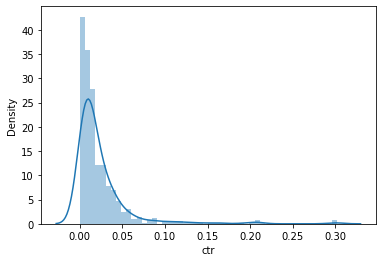

In [155]:
#видим что распределение не нормальное
sns.distplot(df_plt.ctr)

In [157]:
df_plt.groupby(['platform']).agg({'ctr':'median'})

,ctr
platform,
android,0.013988
ios,0.013098
web,0.013889


In [159]:
df_plt.head()

event,ad_id,platform,click,view,ctr
0,3,android,5.0,244.0,0.020492
1,3,ios,3.0,147.0,0.020408
2,3,web,1.0,99.0,0.010101
3,2132,android,1.0,55.0,0.018182
6,2276,android,2.0,703.0,0.002845


In [163]:
df_plt.dtypes

event
ad_id         int64
platform     object
click       float64
view        float64
ctr         float64
dtype: object

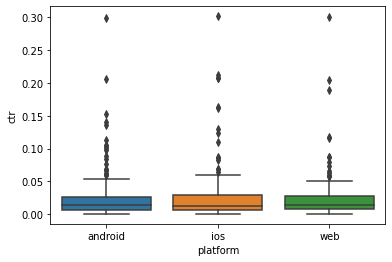

In [166]:
sns.boxplot(x='platform' , y='ctr', data=df_plt)

In [174]:
android = df_plt.query('platform == "android"').ctr_log

In [173]:
ios = df_plt.query('platform == "ios"').ctr_log

In [172]:
web = df_plt.query('platform == "web"').ctr_log

In [175]:
f_oneway(android, ios, web)

F_onewayResult(statistic=0.24695503603978755, pvalue=0.781247319066962)

<H1> Самостоятельная задача, сгенерированная с помошью CHAT GPT

Описание задачи:
Вы - исследователь в области здравоохранения, и вас интересует, влияет ли новое лекарство на уровень холестерина в крови. У вас есть две группы людей: одна группа принимала новое лекарство, а другая группа принимала плацебо. Вы измерили уровень холестерина у всех участников через месяц после начала эксперимента.

In [40]:
#принимала плацебо
a = np.array([5.2, 5.4, 5.5, 5.6, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.8, 7.0])

In [41]:
#новое лекарство
b = np.array([4.8, 4.9, 5.0, 5.1, 5.1, 5.2, 5.3, 5.3, 5.4, 5.5, 5.5, 5.6, 5.7, 5.8, 5.9])

Гипотезы:

Нулевая гипотеза (H0): Средний уровень холестерина у людей, принимающих новое лекарство, не отличается от среднего уровня холестерина у людей, принимающих плацебо.

Альтернативная гипотеза (H1): Средний уровень холестерина у людей, принимающих новое лекарство, отличается от среднего уровня холестерина у людей, принимающих плацебо.

In [42]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import numpy as np
%matplotlib inline

Смотрим на распределения

In [53]:
d = {'a_group': a, 'b_group': b}

In [102]:
df_pharmacy = pd.DataFrame(d)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


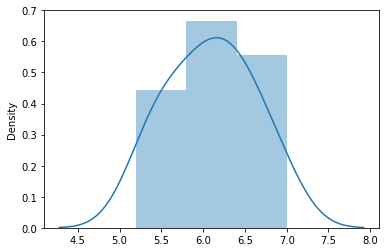

In [45]:
sns.histplot(a)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


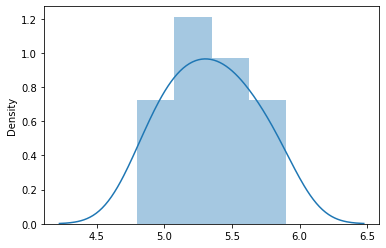

In [47]:
sns.distplot(b)

boxplot значений

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


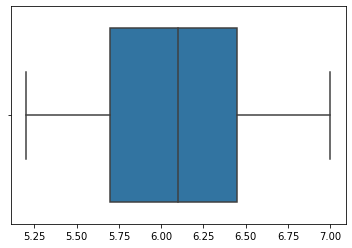

In [48]:
sns.boxplot(a)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


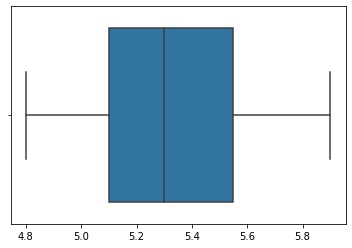

In [50]:
sns.boxplot(b)

In [103]:
a_mean = df_pharmacy.a_group.mean()

NameError: name 'df_farmacy' is not defined

In [104]:
a_std = df_pharmacy.a_group.std()

In [105]:
a_size = df_pharmacy.a_group.shape[0]

In [106]:
b_mean = df_pharmacy.b_group.mean()

In [107]:
b_std = df_pharmacy.b_group.std()

In [108]:
b_size = df_pharmacy.b_group.shape[0]

<h3>Строим доверительный интервал

In [109]:
se_a = a_std / a_size ** 0.5

In [110]:
#вверхнее значение. ТК df = 14, то распределение будет ненормальным, будет T-распределение и уже 95% интервал лежит в 2.14se
a_mean + 2.14 * se_a

6.378199787657954

In [97]:
#нижнее значение
a_mean - 2.14 * se_a

5.795133545675379

In [90]:
print('mean a =',np.round(a_mean,2 ),'; mean b =', b_mean)

mean a = 6.09 ; mean b = 5.34


Видим что в доверительный интервал среднее b не входит. Это значит, что отклоняем нулевую гипотезу и это значит что среднее выборок разное

<h3> Проверим на ttest_ind

In [101]:
ttest_ind(df.a_group, df.b_group)

Ttest_indResult(statistic=4.682839373900593, pvalue=6.599217126156548e-05)

# РЕШЕНИЕ ПРАКТИЧЕСКИХ ЗАДАЧ


Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу  


Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:; X=89,9; sd=11,3; n=20

In [1]:
import numpy as np 
import scipy.stats as st 

In [20]:
x = 89.9

In [21]:
n = 20

In [22]:
sd = 11.3

In [24]:
se = sd / n ** 0.5

In [28]:
#считаем доверительный интервал со степенью свободой 19
st.t.interval(alpha=0.95, df=n-1, 
              loc=x, 
              scale=se) 

(84.61143720745503, 95.18856279254499)

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t-критерий, проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

In [31]:
x1 = 45; x2 = 34; sd1 = 9; sd2 = 10;
n1 = 100; n2 = 100

In [41]:
se = ((sd1**2/n1) + (sd2**2/n2)) ** 0.5

In [38]:
df = 200 - 2

In [42]:
t = (x1 - x2) / se

In [43]:
t

8.176235608718828

При помощи t-критерия можно исследовать взаимосвязь таких двух переменных как: (то есть в каких случаях мы сможем сформировать две выборки и сравнить два средних интересующего нас показателя между собой, таким образом, одна переменная будет разделять участников исследования на две группы, а среднее значение второй переменной будет рассчитываться в каждой из групп)

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import numpy as np
%matplotlib inline

In [ ]:
X
ˉ
 =89,9sd=11,3n=20

In [25]:
mu = 89

In [26]:
sd = 11

In [27]:
n = 20

In [28]:
se = sd / n**0.5

In [31]:
2.093 * se + mu

94.13088158117101

In [30]:
mu - 2.093 * se

83.85190069540224

Задание 6

In [3]:
men = np.random.normal(45, 9, 100).round(2)

In [4]:
women = np.random.normal(34, 10, 100).round(2)

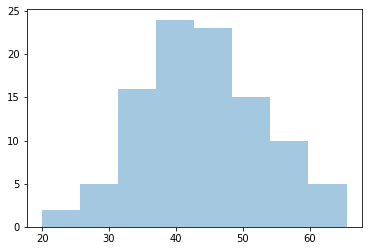

In [9]:
sns.distplot(men, kde=False)

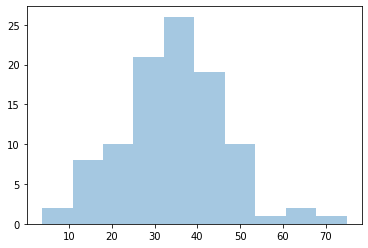

In [10]:
sns.distplot(women, kde=False)

In [13]:
women_mean = 34
women_sd = 10
men_mean = 45
men_df = 9

In [15]:
women_se = 10 / 100**0.5
women_se

1.0

In [16]:
men_se = 9 / 100**0.5

In [18]:
t_test = (men_mean - women_mean) / (women_se + men_se)
t_test

5.7894736842105265

# ПРОЕКТНАЯ ЗАДАЧА


## Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

### Задание 1

Для начала давайте сформулируем гипотезы для проверки. Выберите статистические гипотезы, которые мы сможем проверить в этом эксперименте:

Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет

Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

### Задание 2. Построить графики распределений

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import scipy.stats
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/statistics/experiment_lesson_4.csv')

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [10]:
df_control = df.query('experiment_group == "control"')

In [11]:
df_test = df.query('experiment_group == "test"')

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

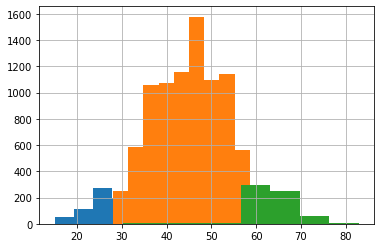

In [30]:
df_control.groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

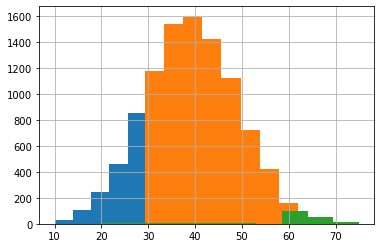

In [31]:
df_test.groupby('district').delivery_time.hist()

### Задание 3
Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [36]:
df_test.shape[0] - df_control.shape[0]

12

### Задание 4
    
Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

In [37]:
df_test.head()

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test


In [40]:
df_control.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [42]:
#контрольная
scipy.stats.normaltest(df_control.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [44]:
#тестовая
scipy.stats.normaltest(df_test.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [46]:
df_test.delivery_time.std()

9.883308351129061

In [47]:
df_control.delivery_time.std()

9.990016960246372

Теперь пришло время сравнить средние в тесте и контроле. 

In [48]:
ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

СТАРЫЙ ВАРИАНТ

In [28]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [27]:
# #pivot with test and control
# df.pivot(index=['order_id', 'district'], columns = 'experiment_group', values='delivery_time').reset_index()

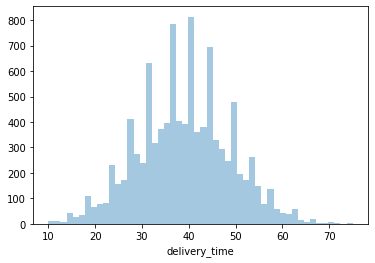

In [32]:
# sns.distplot(df.query('experiment_group == "test"').delivery_time, kde=False)
sns.distplot(df.query('experiment_group == "test"').delivery_time, kde=False)

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

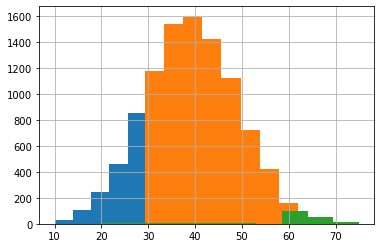

In [43]:
df.query('experiment_group == "test"').groupby('district').delivery_time \
    .hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

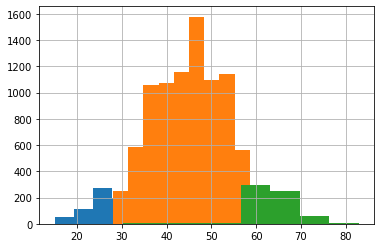

In [44]:
df.query('experiment_group == "control"').groupby('district').delivery_time \
    .hist()

In [46]:
df.groupby('experiment_group', as_index=False) \
    .agg({'order_id': 'count'}).assign(equal = df.)

,experiment_group,order_id
0,control,10092
1,test,10104


In [47]:
10104 - 10092

12

### Задание 4
Проверить распределения на нормалность и узнать стандартное отклонение в тесте и контроле

In [57]:
control = df.query('experiment_group == "control"').delivery_time 
test = df.query('experiment_group == "test"').delivery_time 

In [66]:
#смотрим распределения на нормальность
scipy.stats.normaltest(control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [65]:
scipy.stats.normaltest(test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [60]:
control.std()

9.990016960246372

In [61]:
test.std()

9.883308351129061

### Задание 5
Теперь пришло время сравнить средние в тесте и контроле. 

In [99]:
#проводим т тест
ttest_ind(control, test)


Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

### Задание 6
На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [102]:
control_mean = control.mean()

In [103]:
test_mean = test.mean()

In [110]:
np.round(100 - np.round(test_mean / control_mean * 100, 2 ), 2)

13.35

Ответ: = изменилось на -13.35 процентов